### Importing necessary libraries

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import time 
import os
from IPython.display import Image

### Checking for GPU/CPU

In [93]:
devices = [ "CPU" , "GPU" ]
for device in devices:
  out = tf.config.list_physical_devices ( device )
  if len ( out ) > 0:
    print ( device , "is available." )
    print ( device )
  else:
    print ( device , "is not available." )

CPU is available.
CPU
GPU is available.
GPU


### Checking the GPU configuration

In [94]:
!nvidia-smi

Sat Jan 23 17:17:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    30W /  70W |    297MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Importing the MNIST data

In [95]:
mnist = tf.keras.datasets.mnist
( X_train_full , y_train_full ) , ( X_test , y_test ) = mnist.load_data ( )

### Checking the size of train and test data

In [96]:
print ( "X_train: {}\ty_train: {}" .format ( X_train_full.shape , y_train_full.shape ) )
print ( "X_test: {} \ty_test: {}" .format ( X_test.shape , y_test.shape ) )

X_train: (60000, 28, 28)	y_train: (60000,)
X_test: (10000, 28, 28) 	y_test: (10000,)


### Normalizing the data

In [97]:
X_train_full , X_test = X_train_full / 255 , X_test / 255

### Indicing the validation data from training data

In [98]:
X_valid , y_valid = X_train_full [ : 5000 ] , y_train_full [ : 5000 ]
X_train , y_train = X_train_full [ 5000 : ] , y_train_full [ 5000 : ]
print ( "Shape of Validation Data:" , X_valid.shape )
print ( "Shape of Training Data:" , X_train.shape )

Shape of Validation Data: (5000, 28, 28)
Shape of Training Data: (55000, 28, 28)


### Visualizing a few samples using Seaborn

Number corresponding to the training sample: 7


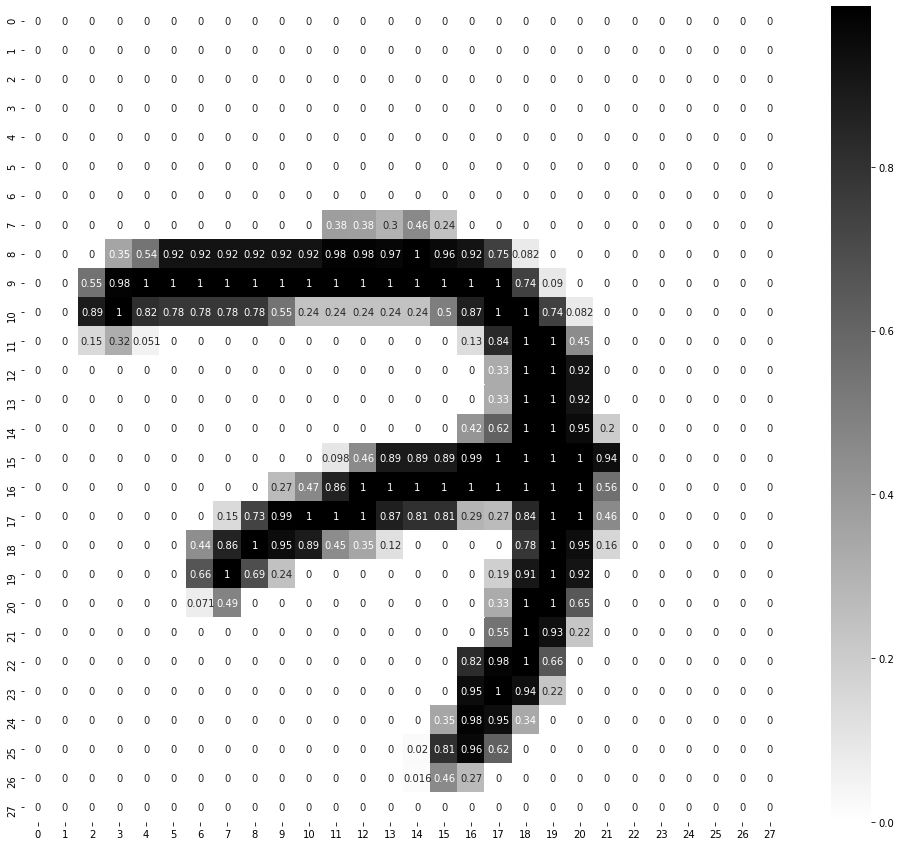

In [99]:
f , ax = plt.subplots ( figsize = ( 17 , 15 ) )
print ( "Number corresponding to the training sample:" , y_train [ 0 ] )
sns.heatmap ( X_train [ 0 ] , cmap = "binary" , annot = True )
plt.show ( )

Number corresponding to the training sample: 3


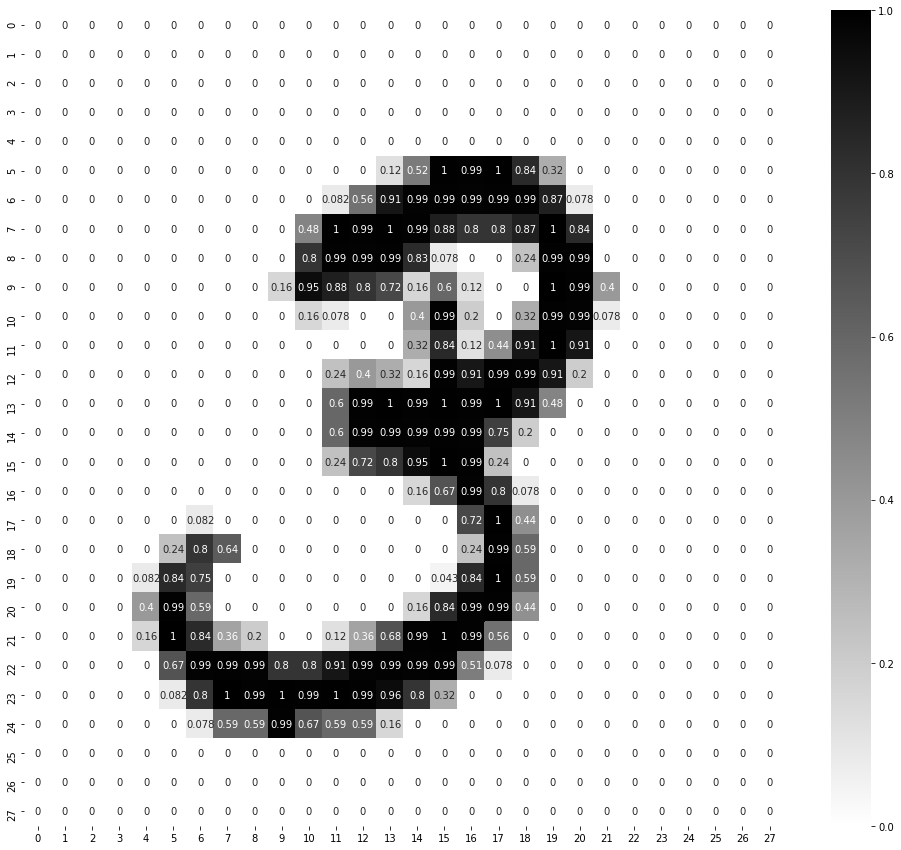

In [100]:
f , ax = plt.subplots ( figsize = ( 17 , 15 ) )
print ( "Number corresponding to the training sample:" , y_train [ 1 ] )
sns.heatmap ( X_train [ 1 ] , cmap = "binary" , annot = True )
plt.show ( )

### Creating an Artificial Neural Network (ANN)

In [101]:
# Creating the layers of neural network
layers = [ tf.keras.layers.Flatten ( input_shape = ( 28 , 28 ) , name = "InputLayer" ) , 
          tf.keras.layers.Dense ( 300 , activation = "relu" , name = "HiddenLayer1" ) , 
          tf.keras.layers.Dense ( 300 , activation = "relu" , name = "HiddenLayer2" ) ,
          tf.keras.layers.Dense ( 300 , activation = "relu" , name = "HiddenLayer3" ) , 
          tf.keras.layers.Dense ( 100 , activation = "relu" , name = "HiddenLayer4" ) , 
          tf.keras.layers.Dense ( 10 , activation = "softmax" , name = "OutputLayer" ) ]
model = tf.keras.Sequential ( layers )

In [102]:
# Model Summary
model.summary ( )

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
HiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 300)               90300     
_________________________________________________________________
HiddenLayer3 (Dense)         (None, 300)               90300     
_________________________________________________________________
HiddenLayer4 (Dense)         (None, 100)               30100     
_________________________________________________________________
OutputLayer (Dense)          (None, 10)                1010      
Total params: 447,210
Trainable params: 447,210
Non-trainable params: 0
________________________________________________

In [103]:
# Finding number of parameters
# Number of parameters = First layer * Second layer + bias
print ( "1st Hidden Layer:" , 28 * 28 * 300 + 300 , "parameters" )
print ( "2nd Hidden Layer:" , 300 * 300 + 300 , "parameters" )
print ( "3rd Hidden Layer:" , 300 * 300 + 300 , "parameters" )
print ( "4th Hidden Layer:" , 300 * 100 + 100 , "parameters" )
print ( "Output Layer:" , 100 * 10 + 10 , "parameters" )

1st Hidden Layer: 235500 parameters
2nd Hidden Layer: 90300 parameters
3rd Hidden Layer: 90300 parameters
4th Hidden Layer: 30100 parameters
Output Layer: 1010 parameters


In [104]:
# Initial Weights assigned randomly ( No weight initialization technique has been used )
model.get_weights ( )

[array([[ 0.03540497,  0.01521064, -0.00327797, ..., -0.00084502,
         -0.05625805, -0.03692301],
        [-0.05751856, -0.032788  ,  0.0405248 , ..., -0.024177  ,
          0.04707689, -0.06586722],
        [-0.00732557, -0.05168764,  0.0678494 , ..., -0.03805147,
          0.03922737,  0.04871971],
        ...,
        [-0.04496344, -0.02475246, -0.0585802 , ..., -0.03886607,
         -0.03400659, -0.05599269],
        [-0.04167581, -0.0451323 ,  0.06922282, ...,  0.00595476,
          0.01035201, -0.03199105],
        [ 0.02254304, -0.05043606, -0.04627106, ...,  0.01433373,
         -0.06133244, -0.07292378]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [105]:
# Initial random Weights and biases for 1st hidden layer
weights , biases = model.layers [ 1 ].get_weights ( )
print ( "Shape of Weights for 1st Hidden layer:\n" , weights.shape )
print ( "Weights for 1st Hidden layer:\n" , weights )
print ( "Shape of Biases for 1st Hidden layer:\n" , biases.shape )
print ( "Biases for 1st hidden layer:\n" , biases )

Shape of Weights for 1st Hidden layer:
 (784, 300)
Weights for 1st Hidden layer:
 [[ 0.03540497  0.01521064 -0.00327797 ... -0.00084502 -0.05625805
  -0.03692301]
 [-0.05751856 -0.032788    0.0405248  ... -0.024177    0.04707689
  -0.06586722]
 [-0.00732557 -0.05168764  0.0678494  ... -0.03805147  0.03922737
   0.04871971]
 ...
 [-0.04496344 -0.02475246 -0.0585802  ... -0.03886607 -0.03400659
  -0.05599269]
 [-0.04167581 -0.0451323   0.06922282 ...  0.00595476  0.01035201
  -0.03199105]
 [ 0.02254304 -0.05043606 -0.04627106 ...  0.01433373 -0.06133244
  -0.07292378]]
Shape of Biases for 1st Hidden layer:
 (300,)
Biases for 1st hidden layer:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [106]:
# Initializing the metrics, optimizer and loss function
model.compile ( metrics = [ "accuracy" ] , optimizer = "SGD" , loss = "sparse_categorical_crossentropy" )

In [107]:
# Fitting the model on training data
history = model.fit ( X_train , y_train , epochs = 30 , validation_data = ( X_valid , y_valid ) )

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.1027 - accuracy: 0.6928 - val_loss: 0.2853 - val_accuracy: 0.9208
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2608 - accuracy: 0.9254 - val_loss: 0.1907 - val_accuracy: 0.9458
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1902 - accuracy: 0.9440 - val_loss: 0.1580 - val_accuracy: 0.9552
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1477 - accuracy: 0.9565 - val_loss: 0.1293 - val_accuracy: 0.9634
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1213 - accuracy: 0.9623 - val_loss: 0.1188 - val_accuracy: 0.9662
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1009 - accuracy: 0.9692 - val_loss: 0.1031 - val_accuracy: 0.9704
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0908 - accuracy: 0.9729 - val_loss: 0.0923 - val_accuracy:

### Visualizing the metrics of training

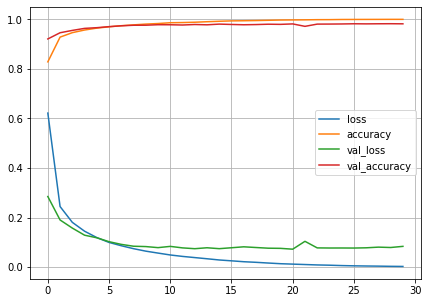

In [111]:
pd.DataFrame ( history.history ).plot ( figsize = ( 7 , 5 ) )
plt.grid ( True )
plt.show ( )

### Saving the model to visualize it using Netron
<a href = "https://github.com/lutzroeder/netron" target = "popup">Download Netron - A tool to visualize Neural Networks</a>

In [113]:
# A custom function to create a folder and save models in reference to timestamps
def SaveModel ( dir = "Saved Models" ):
  os.makedirs ( dir , exist_ok = True )
  filename = time.strftime ( "Model_%d_%m_%Y_%H_%M_%S.h5" )
  model_path = os.path.join ( dir , filename )
  print ( "The model has been saved at" , model_path )
  return model_path

In [116]:
model.save ( SaveModel ( ) )

The model has been saved at Saved Models/Model_23_01_2021_17_46_36.h5


### Evaluation Metrics

In [131]:
print ( model.evaluate ( X_test , y_test ) )
print ( "Test loss:" , model.evaluate ( X_test , y_test ) [ 0 ] )
print ( "Test accuracy:" , model.evaluate ( X_test , y_test ) [ 1 ] )

313/313 [==============================] - 1s 2ms/step - loss: 0.0759 - accuracy: 0.9803
[0.07592526823282242, 0.9803000092506409]
313/313 [==============================] - 1s 2ms/step - loss: 0.0759 - accuracy: 0.9803
Test loss: 0.07592526823282242
313/313 [==============================] - 1s 2ms/step - loss: 0.0759 - accuracy: 0.9803
Test accuracy: 0.9803000092506409


### Predicting the first 5 test samples

Predicted Value: 7
Actual Representation:


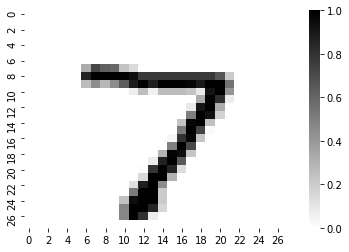

Predicted Value: 2
Actual Representation:


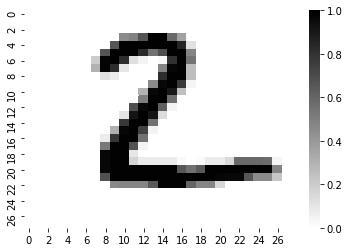

Predicted Value: 1
Actual Representation:


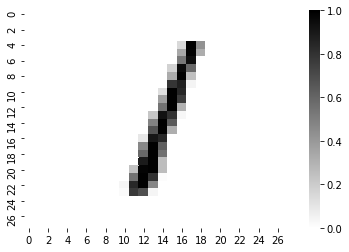

Predicted Value: 0
Actual Representation:


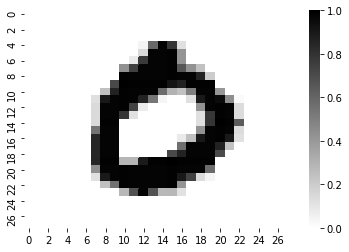

Predicted Value: 4
Actual Representation:


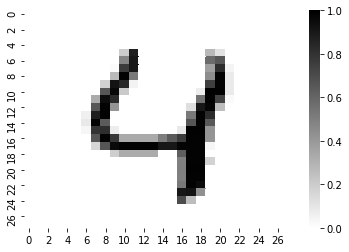

In [140]:
for i in range ( 5 ):
  print ( "Predicted Value:" , model.predict ( X_test [ : 5 ] ).round ( 2 ).argmax ( axis = 1 ) [ i ] )
  print ( "Actual Representation:" )
  sns.heatmap ( X_test [ i ] , cmap = "binary" )
  plt.show ( )